# MEDICIONES SOBRE TIERRA 27/05

El objetivo será encontrar la la constante dieléctrica que mejor caracteriza al suelo. Para ello vamos a realizar las siguientes mediciones:

- S1: medición con placa conductora.
- S2: medición sobre suelo.

* **S_cal = S1**: señal de calibración.
* **S_target = S2**: señal reflejada por el target de interés.

> **La señal de calibración** es la que, idealmente, emite la antena. Si uno pudiese modelar de punta a punta la antena y hacer todas las cuentas necesarias, obtendría que la antena emite el pulso $S_{cal}(t)$, o bien su transformada de Fourier $\hat{S}_{cal}(f)$. Esto lo decimos porque medimos esta señal luego de la reflexión con un target que tiene el coeficiente de reflexión $|R|=1$. Está claro que esto es una hipótesis fuerte, que deberá ser corregida luego. Además, falta contemplar el factor de decaimiento de la señal debido al camino de ida-vuelta entre la antena emisora y la antena receptora. Pero este factor -geométrico- es independiente de las frecuencias del paquete de ondas y del target, así que por ahora podemos ignorarlo.


> **La señal del target** es la que debemos analizar para obtener alguna de las propiedades del blanco en estudio. En principio desconocemos la constante dieléctrica $\epsilon(\omega)$ que tiene el suelo y cuantas capas de diferente constante dielétrica que podemos considerar, con sus alturas d. En principio, la señal reflejada por este target que recibe la antena  es $S_{teo}=R(\omega)\,\times\,S_{antena}(\omega)=R(\omega)\,\times\,S_{cal}(\omega)$. Entonces, aquí tenemos que comparar $S_{teo}$ vs $S_{target}$ y ver qué tan bien andamos rumbeados.


>**Cte dieléctrica**  Para poder hacer el análisis debríamos saber de antemano la constante dieléctrica del target, que sería el parámetro a obtener! Pero bueno, este es el experimento de calibración del método UWB. Así que en este caso asumimos un valor (o varios) para $\epsilon(\omega)$ y completamos el ciclo de análisis de datos.





## Cargamos paquetes y funciones que usaremos después ##

In [141]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
from scipy import stats

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


import os

In [142]:
%run to_baseband.ipynb
%run FFT_ordenada.ipynb
%run to_dB.ipynb
%run mv_to_ep.ipynb
%run R_Fresnel.ipynb

In [143]:
## Parámetros globales de la antena

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8/'

In [144]:
## Selecciono la altura de la antena 

alturas = ['1/','2/','3/','4/']
D = ['37cm','46.5cm','66cm','86.3cm']
h = (0.37, 0.465, 0.66, 0.863)

#elegir entre 0 y 3
NUMERO = 3

altura = alturas[NUMERO]
D = D[NUMERO]
h = h[NUMERO]

In [145]:
if portadora== 'Fc7/':
    fc = 7.290e9 # frecuencia portadora
elif portadora== 'Fc8/':
    fc = 8.748e9
else:
    print('Error: portadora debe ser Fc7 o Fc8')

corte = 150
Nfft= 1024 # nro de frecs -> conviene que sea multiplo de 2 para calcular la FFT de manera eficiente. 
#Tiene que ser mayor a la longitud de la señal (285 para 2m, 439 para 3m)

## Analizo la señal de calibración (S1)

In [146]:
##----------------PREPROCESAMIENTO DE LAS SEÑALES----------------------------##

sistema = 'windows'

if sistema == 'ubuntu':
    ##----Ubuntu----##
    path_Scal = '/home/gordotony/Documents/UWB/mediciones_27_05/S1/'
    
    # cuento el número de archivos en el directorio
    list = os.listdir(path_Scal+portadora+altura) # dir is your directory path
    N_med = int(len(list))
    print('# mediciones para altura',D,'=',N_med)
    print()

    # miro la longitud de cada mediciòn
    L_data = np.zeros(N_med, dtype=int) # vector en donde guardo la long de cada medición


    for j in range(N_med): 
        J = str(j+1)
        len_data_s1 = int(len(open(path_Scal+portadora+altura+J+'_S1.txt').readlines()))
        L_data[j] = len_data_s1
        print('medición #'+J+' =',len_data_s1)
    
    
    print()

    print('long de una medición:',np.shape(np.genfromtxt(path_Scal+portadora+altura+'1_S1.txt', delimiter=' ')))
    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#
    path_Scal = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_27_05\S1'
    
        # cuento el número de archivos en el directorio
    list = os.listdir(path_Scal+'\\'+portadora+'\\'+altura) # dir is your directory path
    N_med = int(len(list))
    print('# mediciones para altura',D,'=',N_med)
    print()

    # miro la longitud de cada mediciòn
    L_data = np.zeros(N_med, dtype=int) # vector en donde guardo la long de cada medición


    for j in range(N_med): 
        J = str(j+1)
        len_data_s1 = int(len(open(path_Scal+'\\'+portadora+'\\'+altura+'\\'+J+'_S1.txt').readlines()))
        L_data[j] = len_data_s1
        print('medición #'+J+' =',len_data_s1)
    
else:
    print('elegir sistema operativo')


## S1/FcX/N  donde, FcX es la portadora (X=7 u 8), 1<= N <= 4 son las 4 alturas en las que tomamos mediciones.
### dentro de cada carpeta N hay 10 mediciones (1<j<10): j_S1_Ncm.txt

print(path_Scal)

# mediciones para altura 86.3cm = 10

medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
medición #6 = 285
medición #7 = 285
medición #8 = 285
medición #9 = 285
medición #10 = 285
C:\Users\Coraline\Documents\UWB\tesis\mediciones_27_05\S1


dim S1: (10, 284, 11)
dim. S_avg = (10, 284)

aca esperamos que todas las mediciones den iguales para dada altura


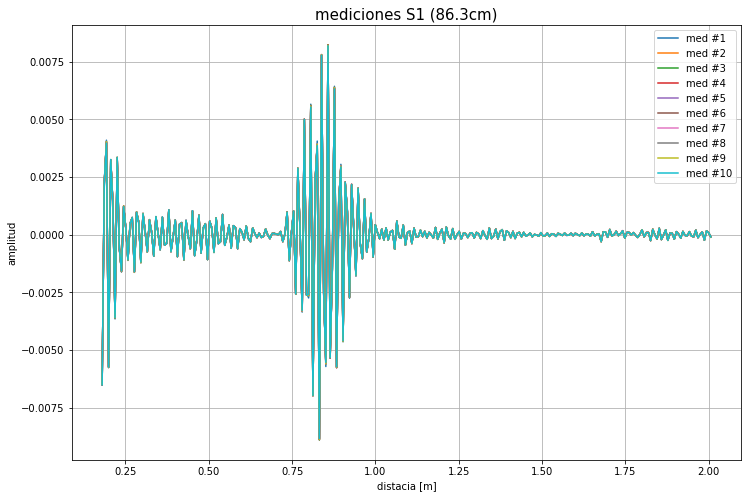

In [147]:
S1 = np.zeros((N_med,int(len_data_s1-1),11),dtype=float)

# S2 = np.zeros((lendata,11,n_H))
# S2_fft = np.zeros((Nfft,n_H), dtype=complex)
# S_tar_fft = np.zeros_like(S2_fft)

if sistema == 'ubuntu':
    for j0 in range(N_med):
        J0 = str(j0+1)
        S1[j0,:,:] = np.genfromtxt(path_Scal+portadora+altura+J0+'_S1.txt', delimiter=' ')
        
elif sistema =='windows':
    for j0 in range(N_med):
        J0 = str(j0+1)
        S1[j0,:,:] = np.genfromtxt(path_Scal+'\\'+portadora+'\\'+altura+'\\'+J0+'_S1.txt', delimiter=' ')
        
else:
    print('defnir sistema operativo')
    

print('dim S1:',np.shape(S1))

## Grafico S_cal(t) en banda pasante
#la distancia es igual para todas las mediciones (de 0.18m a 2m)
dist = S1[0,:,0]
#print(np.shape(dist))

S1_avg  = np.mean(S1[:,:,1:],axis=2)
print('dim. S_avg =', np.shape(S1_avg))

print()
print('aca esperamos que todas las mediciones den iguales para dada altura')
plt.figure(figsize=(12,8))
for j in range(N_med):
    J = str(j+1)
    plt.plot(dist, S1_avg[j,:],label = 'med #'+J)
plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('mediciones S1 ('+D+')', fontsize = 15)
plt.legend(loc="best")
plt.show()


dim. S1_avg_tot (284,)


<function matplotlib.pyplot.show(close=None, block=None)>

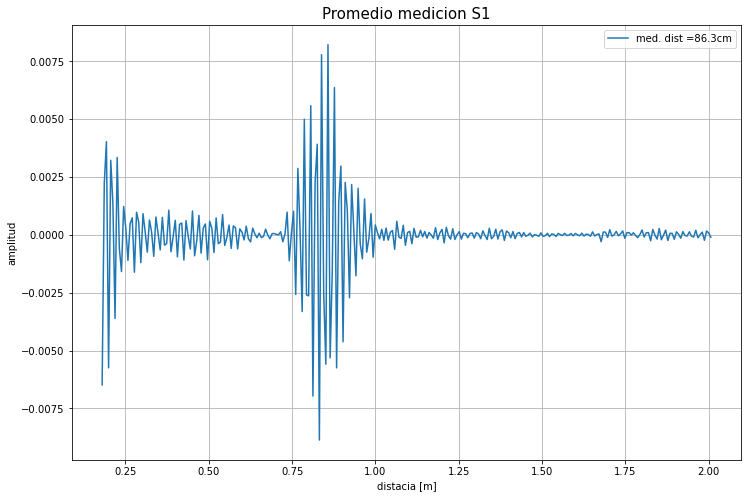

In [148]:
##promedio las 5 mediciones de S_cal:
S1_avg_tot = np.mean(S1_avg[0:,:],axis=0)
print('dim. S1_avg_tot',np.shape(S1_avg_tot))

plt.figure(figsize=(12,8))
plt.plot(dist, S1_avg_tot, label='med. dist ='+D)
plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('Promedio medicion S1', fontsize = 15)
plt.legend(loc="best")
plt.show

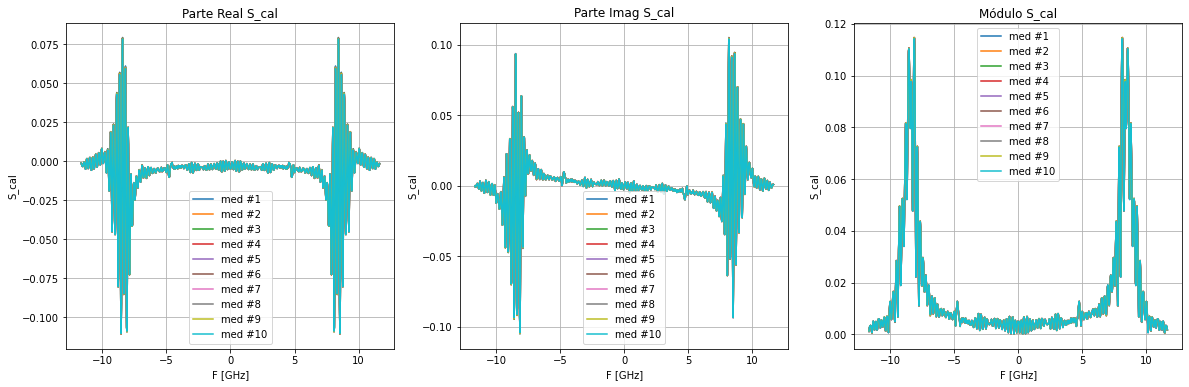

Scal_fft_avg: (1024,)


In [149]:
## Transformo Fourier S_cal y grafico
Scal_fft = np.zeros((N_med,Nfft),dtype=complex)

for j in range(N_med):
    Scal_fft[j,:] = FFT_ordenada(S1_avg[j,:],Nfft,Ts)[1]
frec_fft = FFT_ordenada(S1_avg[0,:],Nfft,Ts)[0]

#promedio las 10 mediciones Scal
Scal_fft_avg = np.zeros(Nfft, dtype=complex)

for j in range(Nfft):
    Scal_fft_avg[j] = np.mean(Scal_fft[:,j])

## Grafico
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for j in range(N_med):
    J = str(j+1)
    
    ax[0].plot(frec_fft/1e9,np.real(Scal_fft[j,:]),label="med #"+ J)
    ax[0].grid('on')
    ax[0].set_xlabel('F [GHz]')
    ax[0].set_ylabel('S_cal')
    ax[0].set_title('Parte Real S_cal')
    
    ax[1].plot(frec_fft/1e9,np.imag(Scal_fft[j,:]),label="med #"+ J)
    ax[1].grid('on')
    ax[1].set_xlabel('F [GHz]')
    ax[1].set_ylabel('S_cal')
    ax[1].set_title('Parte Imag S_cal')
    
    ax[2].plot(frec_fft/1e9,np.abs(Scal_fft[j,:]),label="med #"+ J)
    ax[2].grid('on')
    ax[2].set_xlabel('F [GHz]')
    ax[2].set_ylabel('S_cal')
    ax[2].set_title('Módulo S_cal')

#ax[0].plot(frec_fft/1e9,np.real(Scal_fft_avg),'-k',label = "Avg")
ax[0].legend(loc="best")
#ax[1].plot(frec_fft/1e9,np.imag(Scal_fft_avg),'-k',label = "Avg")
ax[1].legend(loc="best")
#ax[2].plot(frec_fft/1e9,np.abs(Scal_fft_avg),'-k',label = "Avg")
ax[2].legend(loc="best")
plt.show()

print('Scal_fft_avg:', np.shape(Scal_fft_avg))

## Defino frecuecias

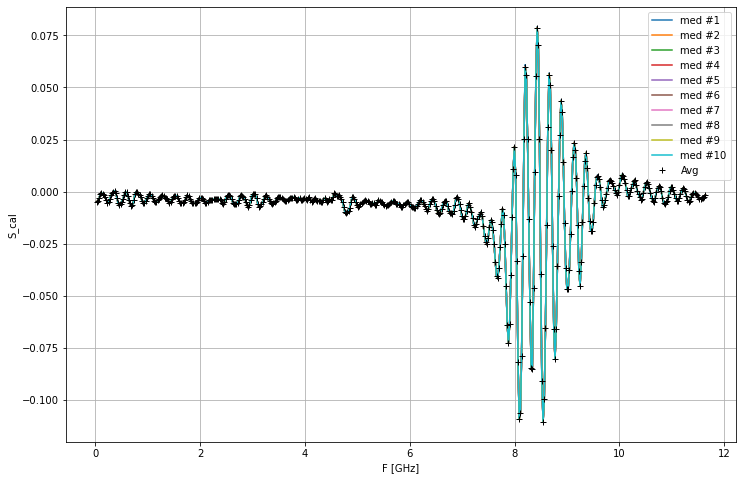

In [150]:
f_pos = frec_fft[frec_fft>0]
n_frecs = len(f_pos)
start = int(1024-n_frecs)
f_norm = f_pos/1e9 # frec >0 normalizada en GHz

Scal_fpos = np.zeros((N_med,n_frecs), dtype=complex)

for j in range(N_med):
    Scal_fpos[j,:] = Scal_fft[j,start:1024]
    

Scal_avg_fpos = Scal_fft_avg[start:1024]


plt.figure(figsize=(12,8))
for j in range(N_med):
    J = str(j+1)
    plt.plot(f_pos/1e9,np.real(Scal_fpos[j,:]),label="med #"+ J)
    #plt.plot(f_pos/1e9,np.imag(Scal_fpos),label="Im(S_cal)")
    #plt.plot(f_pos/1e9,np.abs(S_cal_fpos),label="|S_cal|")
plt.plot(f_pos/1e9,np.real(Scal_avg_fpos),'+k',label="Avg")
plt.grid('on')
plt.legend(loc="best")
plt.xlabel('F [GHz]')
plt.ylabel('S_cal')
plt.show()

## Analizo las señales target (S2) ##

In [151]:
if sistema == 'ubuntu':
    ##----Ubuntu----##
    path_Star = '/home/tele/Desktop/UWB/mediciones_27_05/S2/'

    # cuento el número de archivos en el directorio
    list = os.listdir(path_Star+portadora+altura) # dir is your directory path
    N_med = int(len(list))
    print('# mediciones para altura',D,'=',N_med)
    print()

    # miro la longitud de cada mediciòn
    L_data = np.zeros(N_med, dtype=int) # vector en donde guardo la long de cada medición

    for j in range(N_med): 
        J = str(j+1)
        len_data_s2 = int(len(open(path_Star+portadora+altura+J+'_S2.txt').readlines()))
        L_data[j] = len_data_s2
        print('medición #'+J+' =',len_data_s2)
    
    
    print()

    print('long de una medición:',np.shape(np.genfromtxt(path_Star+portadora+altura+'1_S2.txt', delimiter=' ')))


    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#
    path_Star = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_27_05\S2'
    
        # cuento el número de archivos en el directorio
    list = os.listdir(path_Star+'\\'+portadora+'\\'+altura) # dir is your directory path
    N_med = int(len(list))
    print('# mediciones para altura',D,'=',N_med)
    print()

    # miro la longitud de cada mediciòn
    L_data = np.zeros(N_med, dtype=int) # vector en donde guardo la long de cada medición


    for j in range(N_med): 
        J = str(j+1)
        len_data_s2 = int(len(open(path_Star+'\\'+portadora+'\\'+altura+'\\'+J+'_S2.txt').readlines()))
        L_data[j] = len_data_s2
        print('medición #'+J+' =',len_data_s2)
    
else:
    print('elegir sistema operativo')




# mediciones para altura 86.3cm = 10

medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
medición #6 = 285
medición #7 = 285
medición #8 = 285
medición #9 = 285
medición #10 = 285


(10, 284, 11)
dim. S_avg = (10, 284)


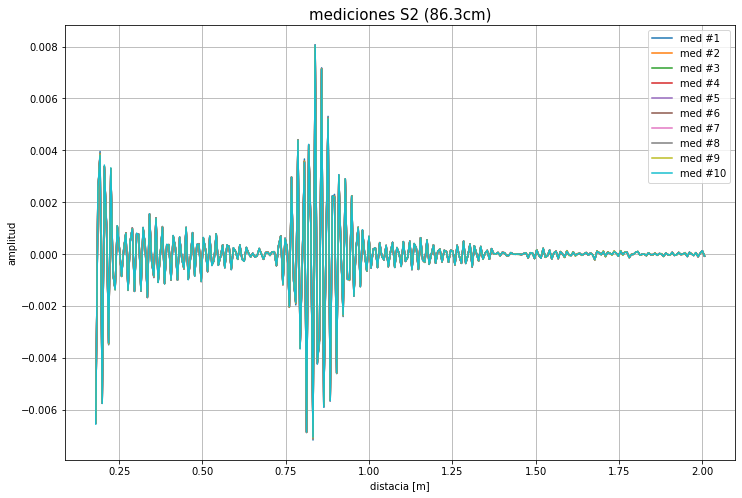

In [152]:
S2 = np.zeros((N_med,int(len_data_s2-1),11))
print(np.shape(S2))



if sistema == 'ubuntu':
    for j0 in range(N_med):
        J0 = str(j0+1)
        S2[j0,:,:] = np.genfromtxt(path_Star+portadora+altura+J0+'_S2.txt', delimiter=' ')

        
elif sistema =='windows':
    for j0 in range(N_med):
        J0 = str(j0+1)
        S2[j0,:,:] = np.genfromtxt(path_Star+'\\'+portadora+'\\'+altura+'\\'+J0+'_S2.txt', delimiter=' ')
        
else:
    print('defnir sistema operativo')



dist = S2[0,:,0]
S2_avg  = np.mean(S2[:,:,1:],axis=2)
print('dim. S_avg =', np.shape(S2_avg))

plt.figure(figsize=(12,8))
for j in range(N_med):
    J = str(j+1)
    plt.plot(dist,S2_avg[j,:],label = 'med #'+J)
plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('mediciones S2 ('+D+')', fontsize = 15)
plt.legend(loc="best")
plt.show()


dim. S2_avg_tot (284,)


<function matplotlib.pyplot.show(close=None, block=None)>

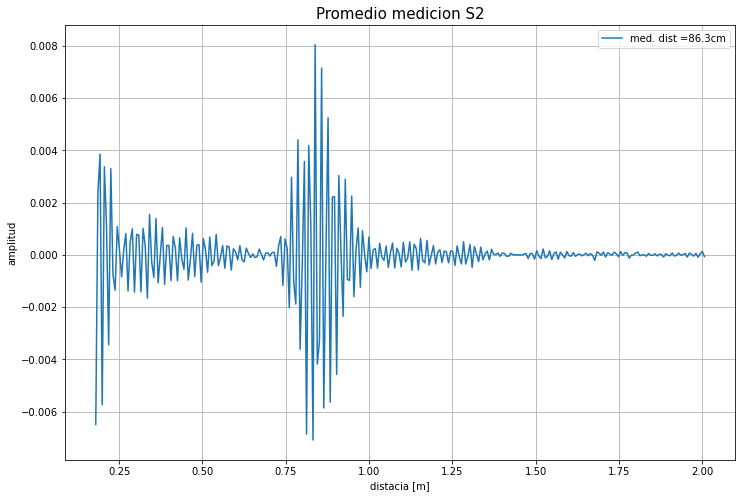

In [153]:
##promedio las 5 mediciones de S_cal:
S2_avg_tot = np.mean(S2_avg[0:,:],axis=0)
print('dim. S2_avg_tot',np.shape(S2_avg_tot))

plt.figure(figsize=(12,8))
plt.plot(dist, S2_avg_tot, label='med. dist ='+D)
plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('Promedio medicion S2', fontsize = 15)
plt.legend(loc="best")
plt.show

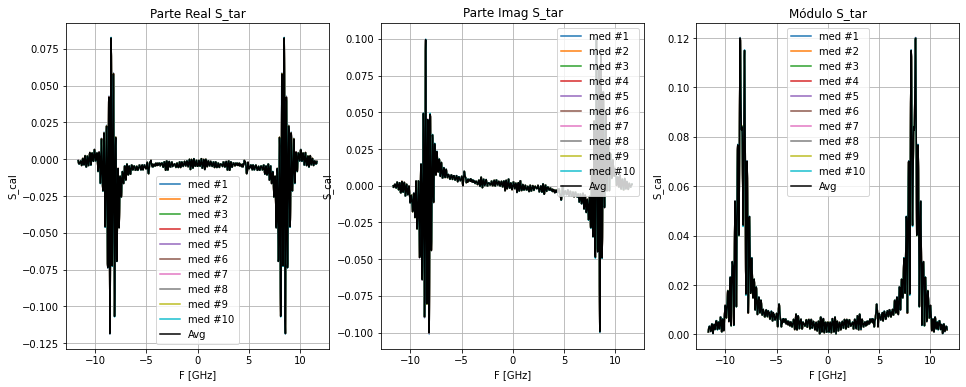

In [154]:
## Transformo Fourier S_cal y grafico
Star_fft = np.zeros((N_med,Nfft),dtype=complex)

for j in range(N_med):
    Star_fft[j,:] = FFT_ordenada(S2_avg[j,:],Nfft,Ts)[1]
frec_fft = FFT_ordenada(S2_avg[0,:],Nfft,Ts)[0]

#promedio las 10 mediciones Star
Star_fft_avg = np.zeros(Nfft, dtype=complex)

for j in range(Nfft):
    Star_fft_avg[j] = np.mean(Star_fft[:,j])

## Grafico
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
for j in range(N_med):
    J = str(j+1)
    
    ax[0].plot(frec_fft/1e9,np.real(Star_fft[j,:]),label="med #"+ J)
    ax[0].grid('on')
    ax[0].set_xlabel('F [GHz]')
    ax[0].set_ylabel('S_cal')
    ax[0].set_title('Parte Real S_tar')
    
    ax[1].plot(frec_fft/1e9,np.imag(Star_fft[j,:]),label="med #"+ J)
    ax[1].grid('on')
    ax[1].set_xlabel('F [GHz]')
    ax[1].set_ylabel('S_cal')
    ax[1].set_title('Parte Imag S_tar')
    
    ax[2].plot(frec_fft/1e9,np.abs(Star_fft[j,:]),label="med #"+ J)
    ax[2].grid('on')
    ax[2].set_xlabel('F [GHz]')
    ax[2].set_ylabel('S_cal')
    ax[2].set_title('Módulo S_tar')

ax[0].plot(frec_fft/1e9,np.real(Star_fft_avg),'-k',label = "Avg")
ax[0].legend(loc="best")
ax[1].plot(frec_fft/1e9,np.imag(Star_fft_avg),'-k',label = "Avg")
ax[1].legend(loc="upper right")
ax[2].plot(frec_fft/1e9,np.abs(Star_fft_avg),'-k',label = "Avg")
ax[2].legend(loc="best")
plt.show()

(511,)


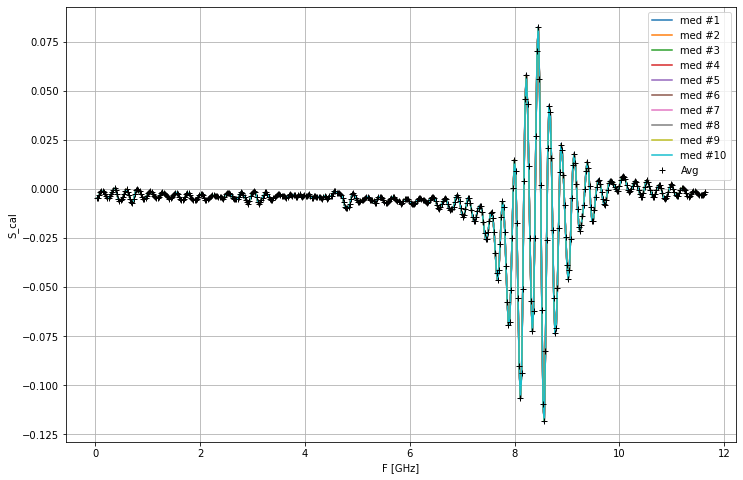

In [155]:
f_pos = frec_fft[frec_fft>0]
f_min = f_pos[0]/1e9
n_frecs = len(f_pos)
start = int(1024-n_frecs)
f_norm = f_pos/1e9 # frec >0 normalizada en GHz

Star_fpos = np.zeros((N_med,n_frecs), dtype=complex)

for j in range(N_med):
    Star_fpos[j,:] = Star_fft[j,start:1024]

Star_avg_fpos = Star_fft_avg[start:1024]

print(np.shape(Star_avg_fpos))

plt.figure(figsize=(12,8))
for j in range(N_med):
    J = str(j+1)
    plt.plot(f_pos/1e9,np.real(Star_fpos[j,:]),label="med #"+ J)
    #plt.plot(f_pos/1e9,np.imag(Scal_fpos),label="Im(S_cal)")
    #plt.plot(f_pos/1e9,np.abs(S_cal_fpos),label="|S_cal|")
plt.plot(f_pos/1e9,np.real(Star_avg_fpos),'+k',label="Avg")
plt.grid('on')
plt.legend(loc="best")
plt.xlabel('F [GHz]')
plt.ylabel('S_cal')
plt.show()

## Comparo Scal vs. Star

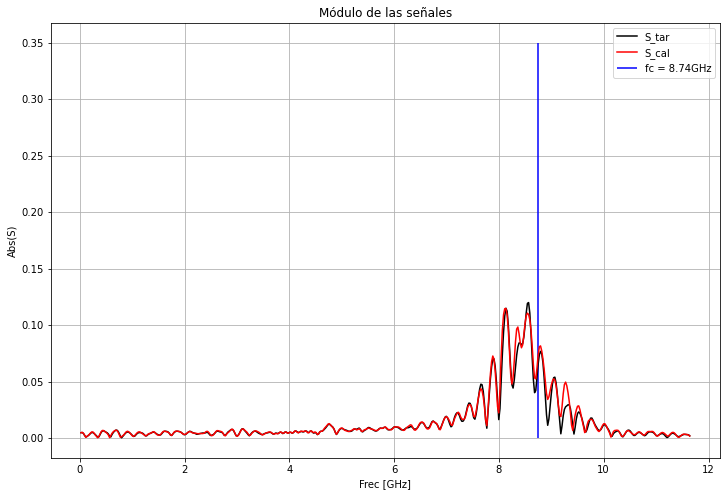

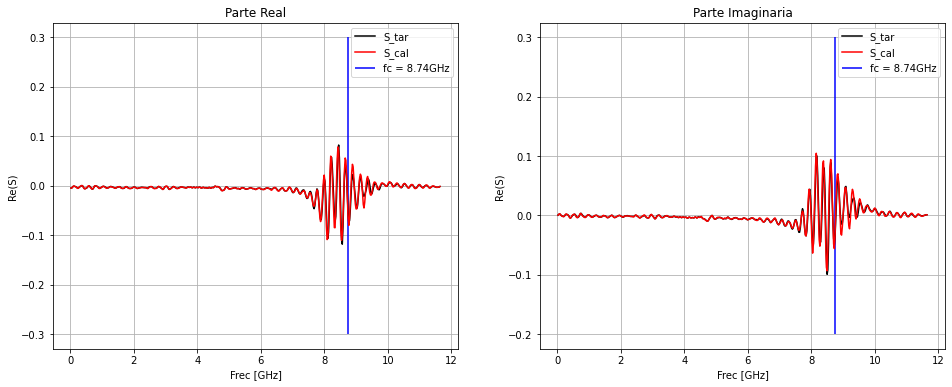

In [156]:
plt.figure(figsize=(12,8))
plt.plot(f_pos/1e9,np.abs(Star_avg_fpos),'-k',label = "S_tar")
plt.plot(f_pos/1e9,np.abs(Scal_avg_fpos),'-r',label = "S_cal")
plt.vlines(fc/1e9,0,0.35,colors='blue',label = "fc = 8.74GHz")
plt.grid()
plt.xlabel('Frec [GHz]')
plt.ylabel('Abs(S)')
plt.legend(loc="best")
plt.title('Módulo de las señales')
plt.show()

fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(f_pos/1e9,np.real(Star_avg_fpos),'-k',label = "S_tar")
ax[0].plot(f_pos/1e9,np.real(Scal_avg_fpos),'-r',label = "S_cal")
ax[0].vlines(fc/1e9,-0.3,0.3,colors='blue',label = "fc = 8.74GHz")
ax[0].grid()
ax[0].set_xlabel('Frec [GHz]')
ax[0].set_ylabel('Re(S)')
ax[0].legend(loc="best")
ax[0].set_title('Parte Real')

ax[1].plot(f_pos/1e9,np.imag(Star_avg_fpos),'-k',label = "S_tar")
ax[1].plot(f_pos/1e9,np.imag(Scal_avg_fpos),'-r',label = "S_cal")
ax[1].vlines(fc/1e9,-0.2,0.3,colors='blue',label = "fc = 8.74GHz")
ax[1].grid()
ax[1].set_xlabel('Frec [GHz]')
ax[1].set_ylabel('Re(S)')
ax[1].legend(loc="best")
ax[1].set_title('Parte Imaginaria')

plt.show()

## Ajuste de las mediciones

Valores del hydra

In [157]:
depth = (0.02, 0.025, 0.065, 0.12)
mv_med = (0.318, 0.292, 0.348, 0.376)
ep_med=(20.731+8.688j, 18.674+7.424j, 23.299+9.799j, 25.813+10.474j)

Text(0.5, 1.0, 'Perfil de humedades')

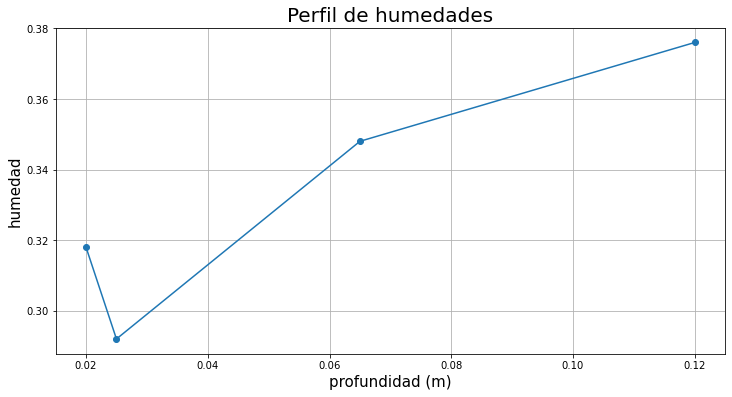

In [158]:
plt.figure(figsize=(12,6))

#perfil de humedades
plt.plot(depth, mv_med,'o-')
plt.grid('on')
plt.xlabel("profundidad (m)", fontsize=15)
plt.ylabel("humedad", fontsize=15)
plt.title("Perfil de humedades", fontsize=20)

In [159]:
#grilla de valores para MV
mv_min, mv_max, n_mv = 0.3, 0.55, 100
MV = np.linspace(mv_min,mv_max,n_mv)

Sand = 0.5
Clay = 0.5

ep_teo = mv_to_ep(MV,Sand,Clay,0)['ep']

#usando el error
#ep_std = 0.01 #std para estimar el error en ep del modelo teórico
#ep_teo = mv_to_ep(MV,Sand,Clay,ep_std)['ep']
#ep_error = mod.mv_to_ep(MV,Sand, Clay,ep_std)['ep_error']

ep_min, ep_max = np.min(ep_teo), np.max(ep_teo)
print('ep min:', ep_min)
print('ep max:', ep_max)


ep min: (13.272599999999999+3.2156849999999997j)
ep max: (28.246537500000002+6.16719125j)


### Modelo medio semi-infinito

In [160]:
# vector para guardar las métricas de error
e_mae = np.zeros(n_mv,dtype=float)

#obs: len(ep_teo)=len(MV)=n_mv
for i in range(n_mv):
    ep = ep_teo[i]
    
    #coef de reflexion depende solo de ep
    R = R_1capa(ep)
    S_teo = Scal_avg_fpos*R

    ##error
    e_mae[i] = np.sum(np.abs(np.abs(S_teo)-np.abs(Star_avg_fpos))) /len(S_teo)

ind = np.argmin(e_mae)

mv_op = MV[ind]
ep_op = ep_teo[ind]
S_op = Scal_avg_fpos*R_1capa(ep_op)
error_mae = e_mae[ind]

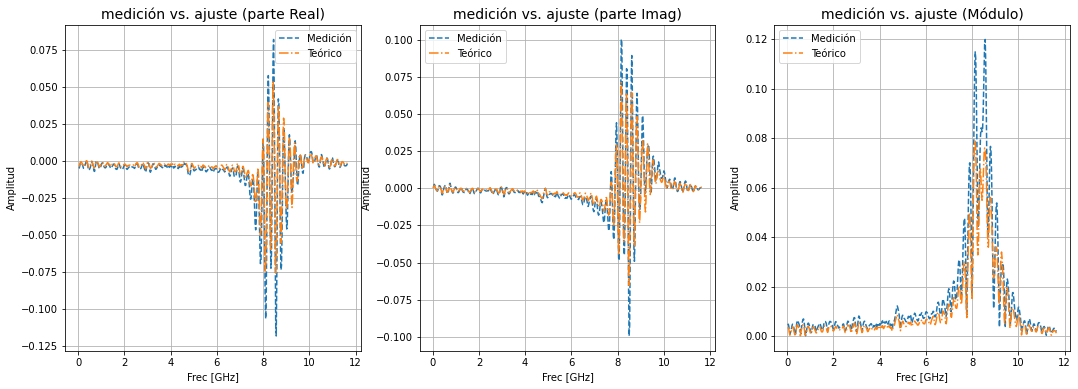

epsilon optimo: (28.246537500000002+6.16719125j)
epsilon medido(2cm): (20.731+8.688j)
epsilon medido(2,5cm): (18.674+7.424j)

humedad optima: 0.55
humedad medida(2cm): 0.318
humedad medida (2,5cm): 0.292


In [161]:
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

ax[0].plot(f_norm,np.real(Star_avg_fpos),'--',label='Medición')
ax[0].plot(f_norm,np.real(S_op),'-.',label='Teórico')
ax[0].grid('on')
ax[0].legend(loc="best",fontsize=10)
ax[0].set_xlabel('Frec [GHz]')
ax[0].set_ylabel('Amplitud')
ax[0].set_title( 'medición vs. ajuste (parte Real)', fontsize=14) #, fontstyle='normal')

ax[1].plot(f_norm,np.imag(Star_avg_fpos),'--',label='Medición')
ax[1].plot(f_norm,np.imag(S_op),'-.',label='Teórico')
ax[1].grid('on')
ax[1].legend(loc="best",fontsize=10)
ax[1].set_xlabel('Frec [GHz]')
ax[1].set_ylabel('Amplitud')
ax[1].set_title( 'medición vs. ajuste (parte Imag)', fontsize=14) #, fontstyle='normal')

ax[2].plot(f_norm,np.abs(Star_avg_fpos),'--',label='Medición')
ax[2].plot(f_norm,np.abs(S_op),'-.',label='Teórico')
ax[2].grid('on')
ax[2].legend(loc="best",fontsize=10)
ax[2].set_xlabel('Frec [GHz]')
ax[2].set_ylabel('Amplitud')
ax[2].set_title( 'medición vs. ajuste (Módulo)', fontsize=14) #, fontstyle='normal')
plt.show()

print('epsilon optimo:', ep_op)
print('epsilon medido(2cm):',ep_med[0])
print('epsilon medido(2,5cm):', ep_med[1])
print()
print('humedad optima:', mv_op)
print('humedad medida(2cm):', mv_med[0])
print('humedad medida (2,5cm):', mv_med[1])

## Modelo con 2 capas

In [162]:
n_ep = 20
ep1Range = np.linspace(ep_min,0.7*ep_max,n_ep)
ep2Range = np.linspace(1.15*ep_min,0.95*ep_max,n_ep)

print('ep1:',ep1Range[0],ep1Range[-1])
print('ep2:',ep2Range[0],ep2Range[-1])

# espesor de la primera capa
d_min, d_max, n_d = 0.018, 0.08, 40
dRange = np.linspace(d_min,d_max,n_d)

print('d:',np.min(dRange),np.max(dRange))

ep1: (13.272599999999999+3.2156849999999997j) (19.77257625+4.317033875j)
ep2: (15.263489999999997+3.6980377499999992j) (26.834210625+5.8588316874999995j)
d: 0.018 0.08


In [163]:
Deltaf = 1.75e9
fmin = fc-Deltaf
fmax = fc+Deltaf
Frecorte = f_pos[(f_pos>fmin) & (f_pos<fmax)]
n_frecs = len(Frecorte)
start = int(np.min(np.where(frec_fft>f_min)))
end = int(np.max(np.where(frec_fft<fmax))+1)

print(n_frecs)
print(start)
print(end)

153
513
973


In [164]:
np.shape(Star_avg_fpos)

(511,)

indices optimos (0, 16, 19)


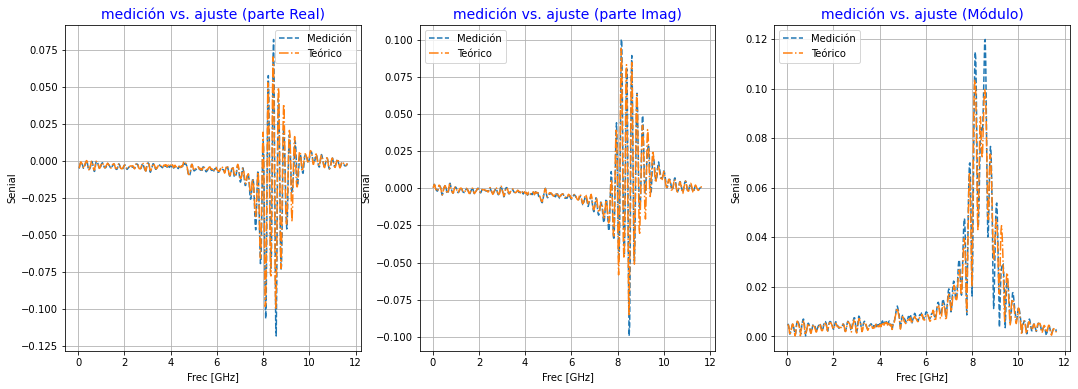

d_opt: 1.8 cm
comparo con las mediciones medidas para depth= 0.025

ep1_opt: 18.746
ep1_medido (2cm): (20.731+8.688j)
ep1_medido (2,5cm): (18.674+7.424j)

ep2_opt: 26.834
ep2_medido (6.5cm): (25.813+10.474j)


In [165]:
%run R_Fresnel.ipynb

# ## Recorto las señales fpos entre fmin y fmax:
# Deltaf = 1.75e9
# fmin = fc-Deltaf
# fmax = fc+Deltaf
# Frecorte = f_pos[(f_pos>fmin) & (f_pos<fmax)]
# n_frecs = len(Frecorte)
# start = np.min(np.where(frec_fft>f_min))
# end = int(np.max(np.where(frec_fft<fmax))+1)

# print(n_frecs)
# print(start)
# print(end)

# # recorto las señales
# Scal = np.zeros(n_frecs, dtype=complex)
# Scal = Scal_avg_fpos[start:end]
# print(np.shape(Scal_avg_fpos))
# Star_avg_fpos = Star_avg_fpos[start:end]
#f_pos
#R_ep1_ep2(ep1,ep2,d,f)

# vector para guardar el error para cada para (EP1,EP2) usado en el ajuste
Errores = np.zeros((n_d,n_ep,n_ep),dtype=float)

# vector en donde guardo la señal teórica que mejor ajusta a cada medición
S_optima = np.zeros(len(Scal_avg_fpos), dtype=complex)

for i0 in range(n_d):
    D = dRange[i0]
    for i1 in range(n_ep):
        EP1 = ep1Range[i1]
        for i2 in range(n_ep):
            EP2 = ep2Range[i2]

            # coef de reflexión con EP1, EP2, D
            R = R_ep1_ep2(EP1,EP2,D,f_pos) # Ref_1capa sólo es válido para frec positivas
            Steo = Scal_avg_fpos*R #*np.exp(-1j*2*D*2*np.pi*f_pos/3e8)
            ## Calculo métricas de error #
            Errores[i0,i1,i2] = np.sum(np.abs(Steo-Star_avg_fpos))/len(Steo)  ## error absoluto medio

print('indices optimos', np.unravel_index(Errores.argmin(),Errores.shape))

indice_d_opt = np.unravel_index(Errores.argmin(),Errores.shape)[0]
D_opt = dRange[indice_d_opt]

indice_ep1_opt = np.unravel_index(Errores.argmin(),Errores.shape)[1]
EP1_opt = ep1Range[indice_ep1_opt]

indice_ep2_opt = np.unravel_index(Errores.argmin(),Errores.shape)[2]
EP2_opt = ep2Range[indice_ep2_opt]

# Señal optima:
R_opt = R_ep1_ep2(EP1_opt,EP2_opt,D_opt,f_pos) 
S_opt = Scal_avg_fpos*R_opt #*np.exp(-1j*2*D*2*np.pi*f_pos/3e8)


fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

ax[0].plot(f_pos/1e9,np.real(Star_avg_fpos),'--',label='Medición')
ax[0].plot(f_pos/1e9,np.real(S_opt),'-.',label='Teórico')
ax[0].grid('on')
ax[0].legend(loc="best",fontsize=10)
ax[0].set_xlabel('Frec [GHz]')
ax[0].set_ylabel('Senial')
ax[0].set_title( 'medición vs. ajuste (parte Real)' ,color ='b', fontsize=14) #, fontstyle='normal')

ax[1].plot(f_pos/1e9,np.imag(Star_avg_fpos),'--',label='Medición')
ax[1].plot(f_pos/1e9,np.imag(S_opt),'-.',label='Teórico')
ax[1].grid('on')
ax[1].legend(loc="best",fontsize=10)
ax[1].set_xlabel('Frec [GHz]')
ax[1].set_ylabel('Senial')
ax[1].set_title( 'medición vs. ajuste (parte Imag)' ,color ='b', fontsize=14) #, fontstyle='normal')

ax[2].plot(f_pos/1e9,np.abs(Star_avg_fpos),'--',label='Medición')
ax[2].plot(f_pos/1e9,np.abs(S_opt),'-.',label='Teórico')
ax[2].grid('on')
ax[2].legend(loc="best",fontsize=10)
ax[2].set_xlabel('Frec [GHz]')
ax[2].set_ylabel('Senial')
ax[2].set_title( 'medición vs. ajuste (Módulo)' ,color ='b', fontsize=14) #, fontstyle='normal')
plt.show()

print('d_opt:', str(round(100*D_opt,3))+' cm')
print('comparo con las mediciones medidas para depth=', depth[1])
print()
print('ep1_opt:',round(np.real(EP1_opt),3))
print('ep1_medido (2cm):', ep_med[0])
print('ep1_medido (2,5cm):', ep_med[1])
print()
print('ep2_opt:',round(np.real(EP2_opt),3))
print('ep2_medido (6.5cm):',ep_med[3])

# Resutados:

* **medicion 0 (34cm)**
>modelo 1 capa:

    epsilon optimo: (28.246537500000002+6.16719125j)
    epsilon medido(2cm): (20.731+8.688j)

    humedad optima: 0.55
    humedad medida(2cm): 0.318

>modelo 2 capas:

    d_opt: 1.8 cm (aprox primera medicion hydra)
    ep1_opt: 13.957         vs      ep1_medido (2cm): (20.731+8.688j)
    ep2_opt: 26.834


* **medicion 1 (45cm)**
>modelo 1 capa:

    epsilon optimo: (28.246537500000002+6.16719125j)
    epsilon medido(2cm): (20.731+8.688j)

    humedad optima: 0.55
    humedad medida(2cm): 0.318

>modelo 2 capas:

    d_opt: 1.8 cm (aprox primera medicion hydra)

    ep1_opt: 19.773         vs      ep1_medido (2cm): (20.731+8.688j)
    ep2_opt: 26.834


* **medicion 2 (65cm)**
>modelo 1 capa:

    epsilon optimo: (28.246537500000002+6.16719125j)
    epsilon medido(2cm): (20.731+8.688j)

    humedad optima: 0.55
    humedad medida(2cm): 0.318

>modelo 2 capas:

    d_opt: 1.8 cm (aprox primera medicion hydra)

    ep1_opt: 18.404             vs      ep1_medido (2cm): (20.731+8.688j)
    ep2_opt: 26.834


* **medicion 3 (85cm)**
>modelo 1 capa:

    epsilon optimo: (28.246537500000002+6.16719125j)
    epsilon medido(2cm): (20.731+8.688j)

    humedad optima: 0.55
    humedad medida(2cm): 0.318

>modelo 2 capas:

    d_opt: 1.8 cm (aprox primera medicion hydra)

    ep1_opt: 18.746             vs      ep1_medido (2cm): (20.731+8.688j)
    ep2_opt: 26.834


# conclusion:
- Para todas las mediciones (si no juego con los parametros) me d que el epsilon optimo es EL MAYOR VALOR que le doy al vector epsilon 

-en la segunda medicion es al revez. me dice que el d que mejor ajusta es el MINIMO VALOR que le permito tomar O_o

